In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=2a5a2018b03150fdc1132912b0872480b89770d68ef1669e1d842ff9fcc8ca7d
  Stored in directory: c:\users\kshub\appdata\local\pip\cache\wheels\aa\8a\36\59ed4f6fbcb6100967618eeb0696046bf9777a41ac2ff1f9b9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=3c15240355342b1f4faa13791d901de7c591f527933fac7428f26efa459b7aa8
  Stored in directory: c:\users\kshub\appdata\local\pip\cache\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [94]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import style 

In [95]:
df=web.DataReader("TSLA",data_source='yahoo',start='01-01-2011',end='21-02-2021')         # Stock used -> TESLA
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,5.45,5.300,5.314,5.326,7089500.0,5.326
2011-01-03,5.40,5.180,5.368,5.324,6415000.0,5.324
2011-01-04,5.39,5.204,5.332,5.334,5937000.0,5.334
2011-01-05,5.38,5.238,5.296,5.366,7233500.0,5.366
2011-01-06,5.60,5.362,5.366,5.576,10306000.0,5.576


In [96]:
df.shape

(2551, 6)

Text(0.5, 1.0, 'TESLA STOCK PRICE')

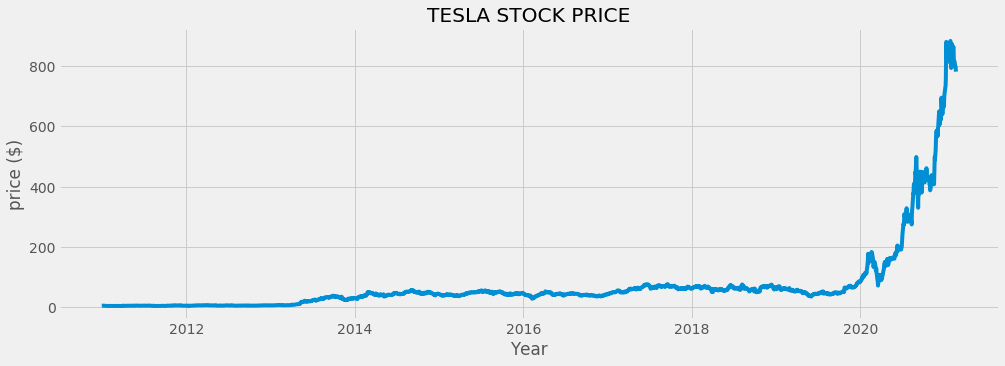

In [97]:
plt.style.use('fivethirtyeight')
plt.figure(1,(15,5))
graph=plt.plot(df['Close'])
plt.xlabel("Year")
plt.ylabel("price ($)")
plt.title("TESLA STOCK PRICE")

In [159]:
#create new dataframe for close column 
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)

In [160]:
dataset

array([[  5.32600021],
       [  5.32399988],
       [  5.33400011],
       ...,
       [798.15002441],
       [787.38000488],
       [781.29998779]])

In [161]:
training_data_len

2041

### Scaling the Data

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
scaler=MinMaxScaler(feature_range=(0,1),copy=True)
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00109249],
       [0.00109022],
       [0.0011016 ],
       ...,
       [0.90333711],
       [0.89108068],
       [0.88416154]])

In [164]:
train_data=scaled_data[0:training_data_len,:]
x_train,y_train=[],[]
for i in range(60,len(train_data)):                 
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print("x_train",x_train)
    print("y_train",y_train)
    print()

x_train [array([1.09249322e-03, 1.09021681e-03, 1.10159721e-03, 1.13801372e-03,
       1.37699665e-03, 1.45893312e-03, 1.50673003e-03, 1.16760210e-03,
       1.16760210e-03, 9.99175800e-04, 8.92202667e-04, 8.67166009e-04,
       5.00726103e-04, 1.79806159e-04, 2.75398895e-04, 6.05422831e-04,
       6.48667474e-04, 6.64599597e-04, 7.03292515e-04, 4.96173835e-04,
       5.16658225e-04, 4.73413582e-04, 4.80241712e-04, 4.09684549e-04,
       3.70992174e-04, 2.82227025e-04, 6.05422831e-04, 3.14091813e-04,
       3.16367676e-04, 3.23195806e-04, 2.84503430e-04, 2.29878390e-04,
       6.60047872e-04, 4.02856419e-04, 3.07263683e-04, 9.10399256e-06,
       0.00000000e+00, 1.59321769e-04, 4.05132824e-04, 4.68861315e-04,
       4.80241712e-04, 4.98449698e-04, 5.75834991e-04, 7.10120102e-04,
       7.07844240e-04, 6.44115749e-04, 6.57771467e-04, 4.96173835e-04,
       5.09830095e-04, 3.23195806e-04, 2.54915048e-04, 2.25326665e-04,
       2.23050260e-04, 2.57190910e-04, 2.04842275e-04, 8.19370184e-0

In [165]:
x_train

[array([1.09249322e-03, 1.09021681e-03, 1.10159721e-03, 1.13801372e-03,
        1.37699665e-03, 1.45893312e-03, 1.50673003e-03, 1.16760210e-03,
        1.16760210e-03, 9.99175800e-04, 8.92202667e-04, 8.67166009e-04,
        5.00726103e-04, 1.79806159e-04, 2.75398895e-04, 6.05422831e-04,
        6.48667474e-04, 6.64599597e-04, 7.03292515e-04, 4.96173835e-04,
        5.16658225e-04, 4.73413582e-04, 4.80241712e-04, 4.09684549e-04,
        3.70992174e-04, 2.82227025e-04, 6.05422831e-04, 3.14091813e-04,
        3.16367676e-04, 3.23195806e-04, 2.84503430e-04, 2.29878390e-04,
        6.60047872e-04, 4.02856419e-04, 3.07263683e-04, 9.10399256e-06,
        0.00000000e+00, 1.59321769e-04, 4.05132824e-04, 4.68861315e-04,
        4.80241712e-04, 4.98449698e-04, 5.75834991e-04, 7.10120102e-04,
        7.07844240e-04, 6.44115749e-04, 6.57771467e-04, 4.96173835e-04,
        5.09830095e-04, 3.23195806e-04, 2.54915048e-04, 2.25326665e-04,
        2.23050260e-04, 2.57190910e-04, 2.04842275e-04, 8.193701

In [166]:
y_train

[0.0004756894448357989,
 0.00042789307689851223,
 0.001347408263925814,
 0.0010993208037354315,
 0.0009104106518178128,
 0.0011084253389449213,
 0.0010606284283604045,
 0.0012313305951535038,
 0.0010606284283604045,
 0.0007829531280044849,
 0.0006418393440241529,
 0.0007055683772544319,
 0.0007533647451917185,
 0.0008535102913182656,
 0.0007283286299836957,
 0.000757917012796463,
 0.0008922026666932925,
 0.001117529331507181,
 0.0010378681756311407,
 0.0011607739744869524,
 0.001194914082257235,
 0.0013269238736753064,
 0.0013132676135083022,
 0.0012791269630907905,
 0.0011471177143199474,
 0.001106148933818934,
 0.0010492485733193868,
 0.0012040180748194946,
 0.0013838242341748536,
 0.0014794175126966562,
 0.0011926382197784769,
 0.0013291997361540644,
 0.0013018877584672845,
 0.0010856650862156566,
 0.00093999903463058,
 0.00102876418306888,
 0.0014498291298838898,
 0.0013974804943418587,
 0.0011357373166317013,
 0.0011129770639024365,
 0.0016273594267604908,
 0.0017411606904068136,


In [167]:
#Reshape the data
x_train,y_train=np.array(x_train),np.array(y_train)     
#convert into array to use in lstm model
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1981, 60, 1)

### LSTM Model

In [168]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [169]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [170]:
model.compile(optimizer='adam',loss='mean_squared_error')

## Training the Model

In [171]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1981/1981 [==============================] - 61s 31ms/step - loss: 4.5574e-05


In [172]:
#Testing the Model

test_data=scaled_data[training_data_len - 60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
type(y_test)

numpy.ndarray

In [174]:
#convert into array X_test
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(510, 60, 1)

In [175]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [176]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

34.54656525406183

C:\Users\kshub\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


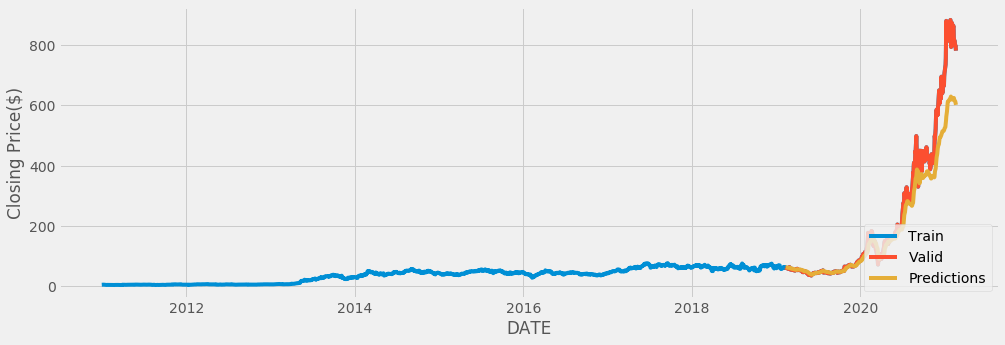

In [188]:
train1=data[:training_data_len]
validation=data[training_data_len:]
validation['Predictions']=predictions
plt.figure(figsize=(15,5))
plt.xlabel("DATE")
plt.ylabel("Closing Price($)")
plt.plot(df['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [185]:
#Predicting stock proce of next day
sample=web.DataReader("TSLA",data_source='yahoo',start='01-01-2011',end='21-02-2021')
new_df=sample.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[597.92993]]


In [187]:
#Conclusion

sample2=web.DataReader("TSLA",data_source='yahoo',start='01-01-2011',end='21-02-2021')
print(sample2['Close'])

Date
2010-12-31      5.326000
2011-01-03      5.324000
2011-01-04      5.334000
2011-01-05      5.366000
2011-01-06      5.576000
                 ...    
2021-02-12    816.119995
2021-02-16    796.219971
2021-02-17    798.150024
2021-02-18    787.380005
2021-02-19    781.299988
Name: Close, Length: 2551, dtype: float64


## Thank You   